In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
numTeste = "3"
#tipoTeste = "sw"
tipoTeste = "parimpar"
df = pd.read_table("../Saidas/Teste"+numTeste+"/info_"+tipoTeste+".txt", sep=" ")
#df.drop(df[df.Tempo > 150].index, inplace=True)
#df

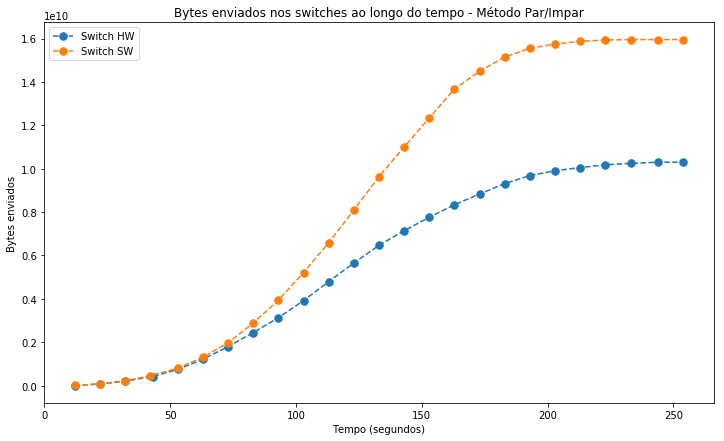

In [3]:
#Agrupando por switch
switches = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")
df["Trafego"] = switches['BytesEnviados'].diff()
groups = df.groupby (['Switch'])
# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.BytesEnviados, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Bytes enviados')
if(tipoTeste == "parimpar"):
    plt.title(u"Bytes enviados nos switches ao longo do tempo - Método Par/Impar") #u = unicode
else:
    plt.title(u"Bytes enviados nos switches ao longo do tempo - Método SW/HW")
ax.legend()
plt.savefig('bytesenviados_Tempo_'+tipoTeste+'_teste'+numTeste+'.pdf')
plt.show()